# Advanced Seaborn - Figure Level Functions


In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%config Completer.use_jedi = False

# We do this to ignore several specific warnings
warnings.filterwarnings('ignore')

%precision %.3f
pd.options.display.float_format = '{:,.3f}'.format

# auto load imports
# in case of module dev
%load_ext autoreload
%autoreload 2

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [4]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100,18.700,181.000,"3,750.000",Male
1,Adelie,Torgersen,39.500,17.400,186.000,"3,800.000",Female
2,Adelie,Torgersen,40.300,18.000,195.000,"3,250.000",Female
3,Adelie,Torgersen,nan,nan,nan,nan,NaN
4,Adelie,Torgersen,36.700,19.300,193.000,"3,450.000",Female


## FacetGrid

Let's see what happens if we call the constructor FacetGrid without a plotting method.

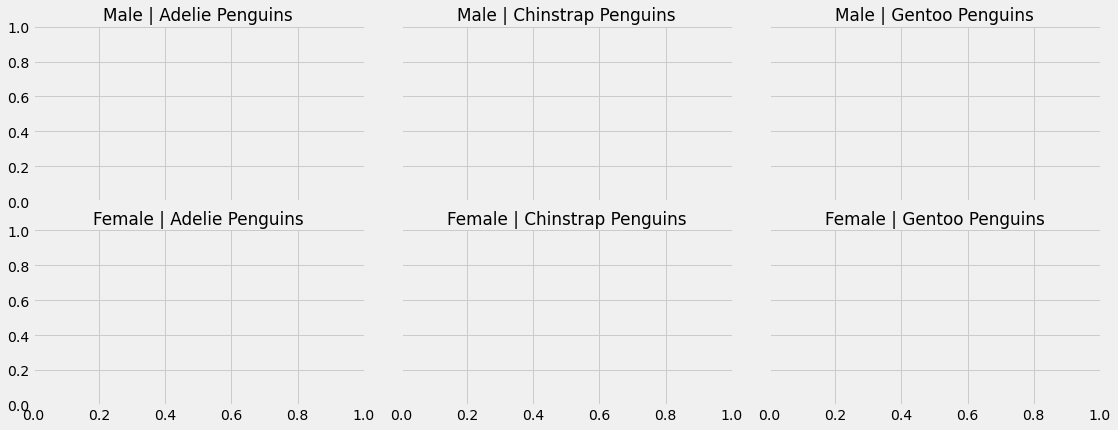

In [5]:
plt.style.use('fivethirtyeight')
g = sns.FacetGrid(penguins, row='sex', col='species', aspect=1.75)
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');

FacetGrid provides two method for plotting: `map()` and `map_dataframe()`.
Let's use the `map_dataframe()` method

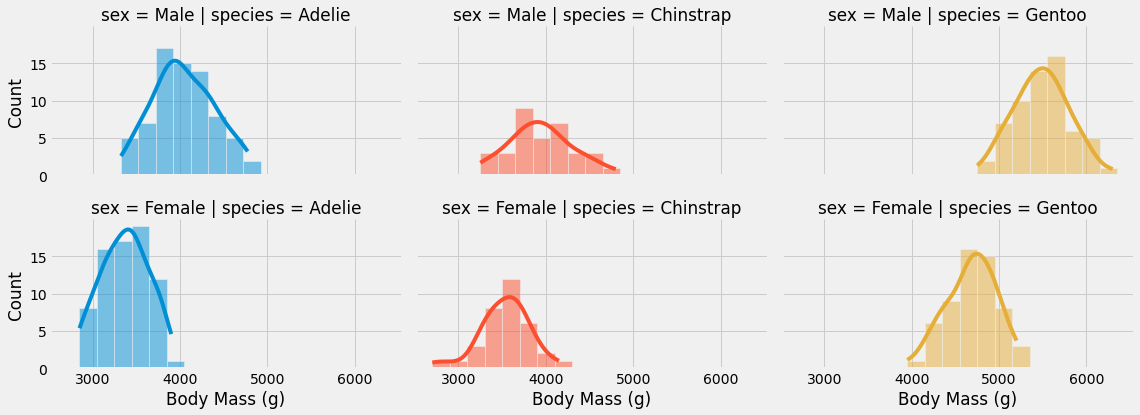

In [6]:
plt.rcParams["figure.figsize"] = 9,7
g = sns.FacetGrid(penguins, row='sex', col='species', hue='species', aspect=1.75)
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');

g.map_dataframe(sns.histplot, 'body_mass_g', binwidth=200, kde=True)
g.set_axis_labels('Body Mass (g)', "Count")


When using seaborn we are not only limited to the seaborn plotting styles. Well, since seaborn is built on top of matplotlib, we can just as well use the matplotlib plotting styles. 

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [8]:
plt.style.use('bmh')

### Using Custom Functions

The function we pass to the FacetGrid plotting methods doesn’t have to be a seaborn or matplotlib plotting function. `map()` and `map_dataframe()` can handle any type of function as long as it meets the following requirements:

1. It must plot on the “currently active” matplotlib axes. This applies to functions in the matplotlib.pyplot namespace. In fact you can call matplotlib.pyplot.gca() to get a reference to the current axes if you intend to use their methods.
2. It must accept the data that it plots as arguments.  
3. It must have a generic dictionary of `**kwargs` and pass it along to the underlying plotting function.

So let’s define our own custom function according to the above requirements. The function is supposed to compute the average of a given variable and add it as a dashed line to the currently active axes.

In [9]:
def add_mean(data, var, **kwargs):

    # 1. requirement
    # Calculate mean for each group
    m = np.mean(data[var])
    
    # 2. requirement
    # Get current axis
    ax = plt.gca()
    
    # 3. requirement
    # Add line at group mean
    ax.axvline(m, color='maroon', lw=3, ls='--')
    
    # Annotate group mean
    x_pos=0.6
    if m > 5000: x_pos=0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}', 
            transform=ax.transAxes,  
            color='maroon', fontweight='bold', 
            fontsize=14)

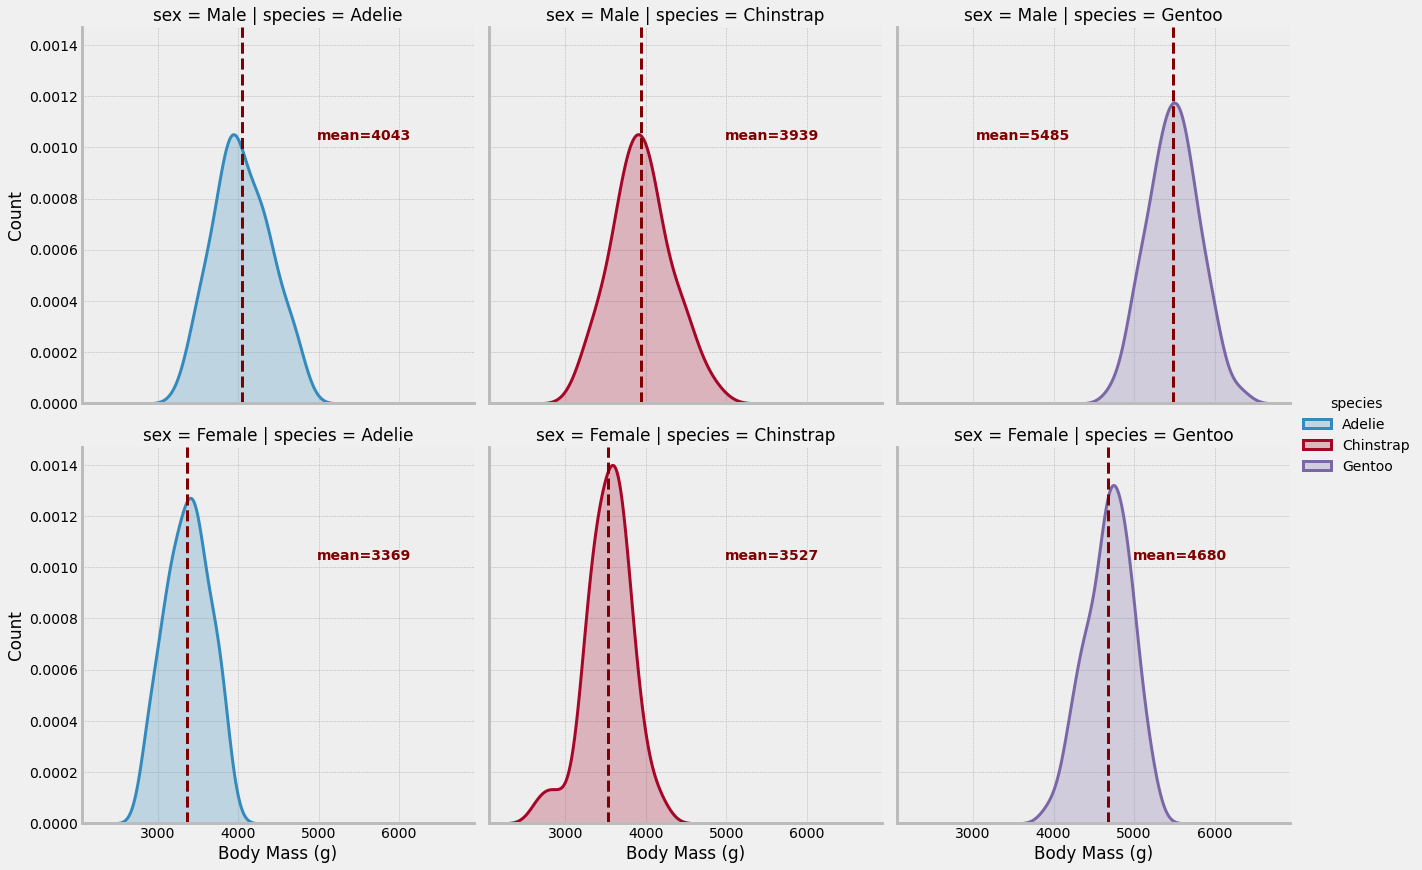

In [10]:
g = sns.FacetGrid(penguins, row='sex', col='species', hue='species', height=6, aspect=1)

g.map(sns.kdeplot, 'body_mass_g', lw=3, shade=True)
g.map_dataframe(add_mean, var='body_mass_g')
g.set_axis_labels('Body Mass (g)', "Count")
g.add_legend()

As you can see, FacetGrid is simple yet powerful. In just a few lines and without thinking about the layout and the appearance, you can elegantly convey a great deal of information. In my opinion, this is a vastly under-used technique in visualization and should actually be part of every exploratory data analysis, whether your goal is a report or a model.

Let's try another example using the mpg dataset from seaborn. We start by loading the dataset as pandas dataframe

In [11]:
# load mpg
mpg = sns.load_dataset('mpg')

Then we define our custom function, that will plot a dot representing the mean of both variables x and y or 'weight' and 'mpg', respectively.  
<div class="alert alert-block alert-warning">
<b>Note:</b> The requirements listed above should be satisfied!
</div>
 

In [12]:
def add_mean_point(x, y, **kwargs):
    
    # 1. requirement
    data = kwargs.pop('data')
    x = np.mean(data[x])
    y = np.mean(data[y])
    
    # 2. requirement
    ax = plt.gca()
    
    # add a point 
    ax.scatter(x, y, c='darkred', s=200)
    

Then we can call our own function using the `FacetGrid` method `map_dataframe()`.

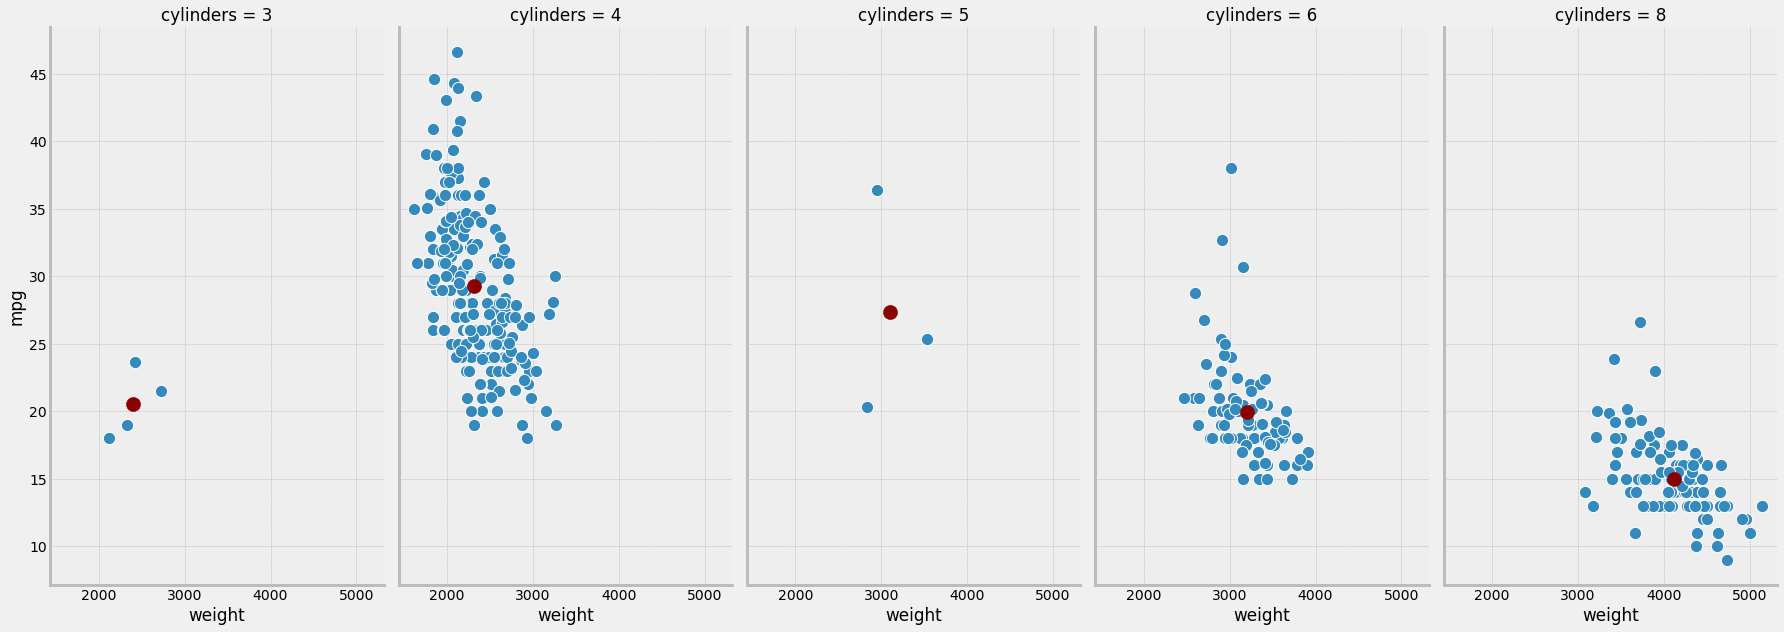

In [13]:

g = sns.FacetGrid(mpg, col='cylinders', height=9, aspect=5/9)
g.set_titles(col_template='{col_name}');

g.map(sns.scatterplot, 'weight', 'mpg', s=150)
g.map_dataframe(add_mean_point,'weight', 'mpg' );


In [14]:
mpg.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.000,23.515,7.816,9.000,17.500,23.000,29.000,46.600
cylinders,398.000,5.455,1.701,3.000,4.000,4.000,8.000,8.000
displacement,398.000,193.426,104.270,68.000,104.250,148.500,262.000,455.000
horsepower,392.000,104.469,38.491,46.000,75.000,93.500,126.000,230.000
weight,398.000,"2,970.425",846.842,"1,613.000","2,223.750","2,803.500","3,608.000","5,140.000"
acceleration,398.000,15.568,2.758,8.000,13.825,15.500,17.175,24.800
model_year,398.000,76.010,3.698,70.000,73.000,76.000,79.000,82.000


## PairGrid
<div class="alert alert-block alert-warning">
<b>It is important to understand the difference between a FacetGrid and a PairGrid:</b><br>
In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship (although the upper and lower triangles will have mirrored plots). Using PairGrid can give you a very quick, very high-level summary of interesting relationships in your dataset.
</div>


In [15]:
iris = sns.load_dataset('iris')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100,18.700,181.000,"3,750.000",Male
1,Adelie,Torgersen,39.500,17.400,186.000,"3,800.000",Female
2,Adelie,Torgersen,40.300,18.000,195.000,"3,250.000",Female
3,Adelie,Torgersen,nan,nan,nan,nan,NaN
4,Adelie,Torgersen,36.700,19.300,193.000,"3,450.000",Female


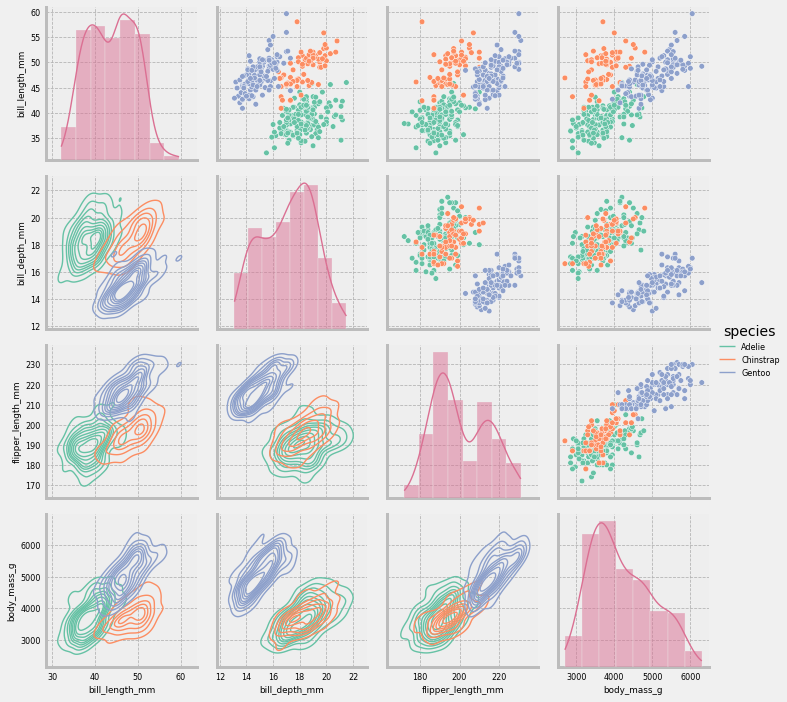

In [16]:
plt.style.use('seaborn-paper')
g = sns.PairGrid(penguins, diag_sharey=False, hue="species", palette="Set2")
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, hue=None, legend=False, color='palevioletred', kde=True, bins=8, lw=.3)
g.map_lower(sns.kdeplot, lw=.1)
g.add_legend()

Another possible way of representing a PairGrid. Note that it is possible to display more than one plot on the same axes. This makes it very handy. Specially when using non-obstructive plots such as regplots or strip plots.

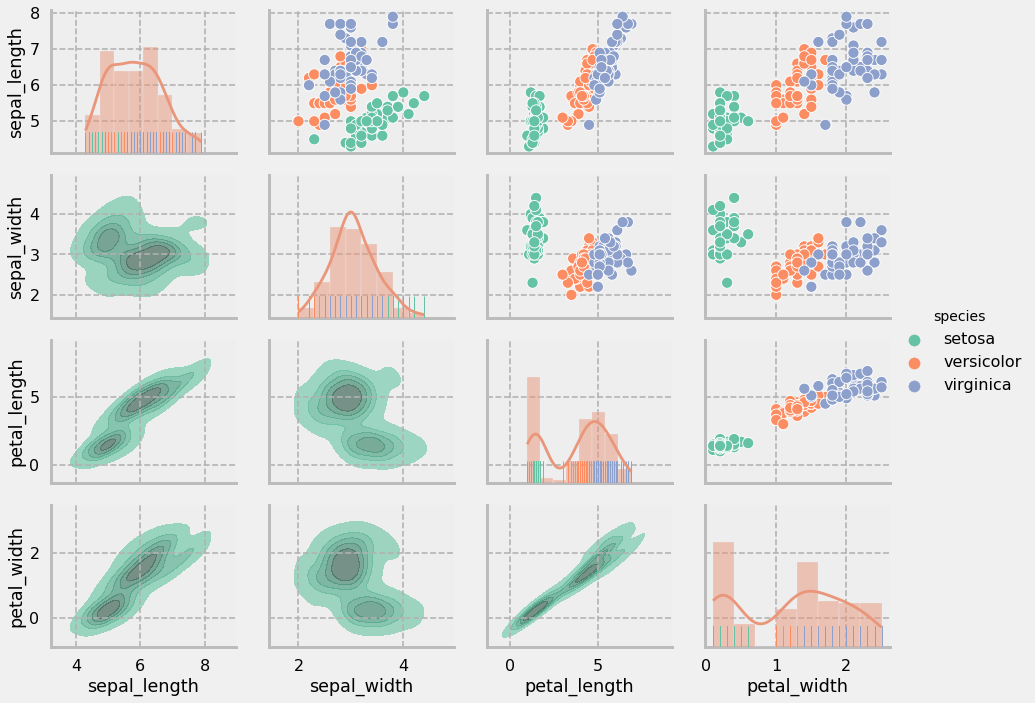

In [17]:
plt.style.use('seaborn-poster')
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris, diag_sharey=False, hue="species", palette="Set2", aspect=1.3)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, hue=None, legend=False, color='darksalmon', kde=True, bins=8, lw=.3)
g.map_diag(sns.rugplot, legend=False, height=.15)
g.map_lower(sns.kdeplot,  shade=True, lw=1, 
            shade_lowest=False, n_levels=6, 
            zorder=0, alpha=.7, hue=None,
            color='mediumaquamarine')
g.add_legend();

And of course, we are not limited to use only seaborn or matplotlib functions. PairGrid as for FacetGrid accepts other custom functions.

In [18]:
from scipy import stats
def corrfunc(x, y, **kws):
    # Compute the pearson correlation coefficient
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    # Annotate r on the active axes
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)


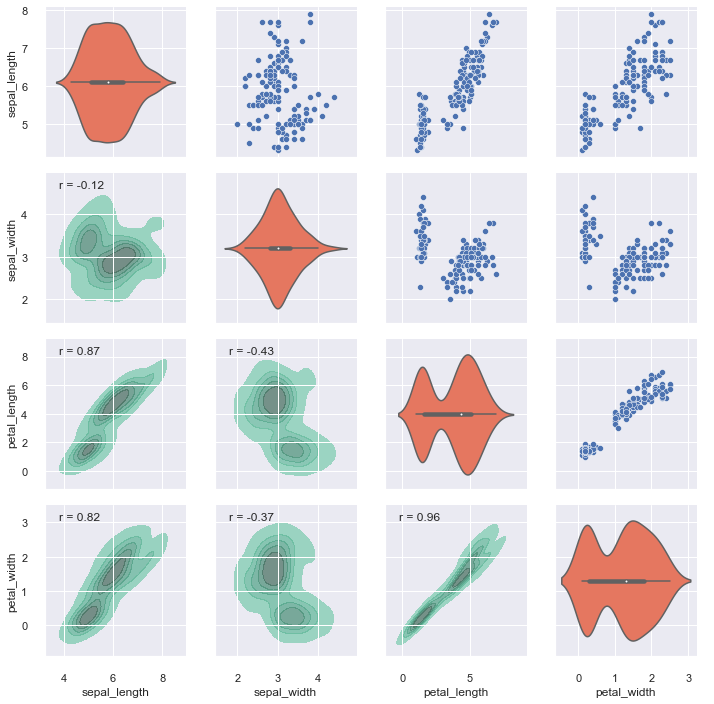

In [19]:
iris = sns.load_dataset('iris')
sns.set_theme()
g = sns.PairGrid(iris, diag_sharey=False, palette="Set2")
# Scatter plots on the upper triangle
g.map_upper(sns.scatterplot)
# Violin plots
g.map_diag(sns.violinplot, hue=None, legend=False, palette='Reds', lw=.3)
# Kde with helix
g.map_lower(sns.kdeplot,  shade=True, lw=1, 
            shade_lowest=False, n_levels=6, 
            zorder=0, alpha=.7, hue=None,
            color='mediumaquamarine')
# Pearson's correalation coeff
g.map_lower(corrfunc)
g.add_legend();

## JointGrid

Another class to generate small muliples provided by seaborn.

In [20]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Let's just call the constructor to see how the layout looks like.

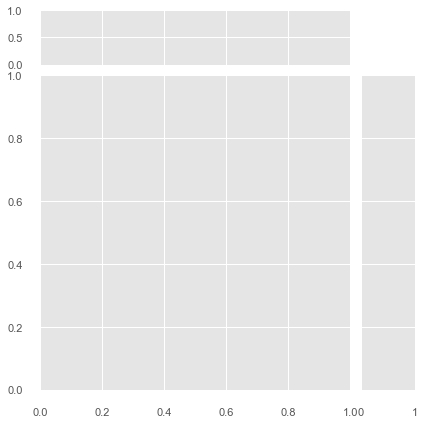

In [21]:
plt.style.use('ggplot')
g = sns.JointGrid(data=[], marginal_ticks=True)


The middle, large axes, referred to as joint axes, is intended for bivariate plots such as scatter and regression. The other two axes, known as marginal axes, are meant for univariate plots.
The simplest plot method, `plot()`, takes a pair of functions: one for the joint axes and one for the two marginal axes.

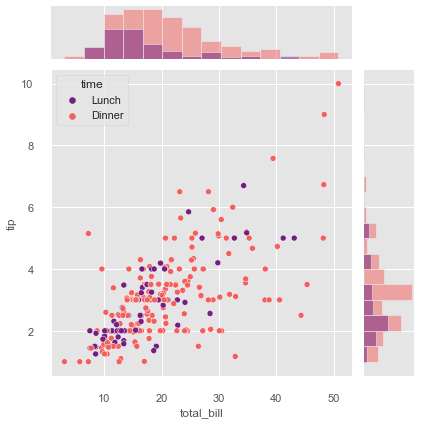

In [22]:
tips = sns.load_dataset('tips')
g = sns.JointGrid(x="total_bill", y="tip", data=tips, hue="time", palette="magma")
g.plot(sns.scatterplot, sns.histplot);

In [23]:
# List the methods and variables provided by the JointGrid instance
print(dir(g))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_hue_params', '_inject_kwargs', 'ax_joint', 'ax_marg_x', 'ax_marg_y', 'fig', 'hue', 'plot', 'plot_joint', 'plot_marginals', 'savefig', 'set_axis_labels', 'x', 'y']


If you prefer to use different arguments for each function then you should use the following JointGrid class methods: `plot_joint()` and `plot_marginals()`.

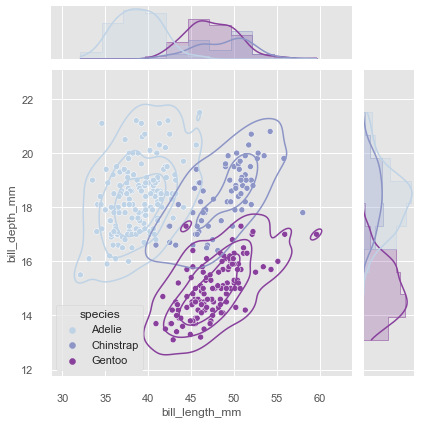

In [24]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", palette="BuPu")
g.plot_marginals(sns.histplot,  kde=True, hue=None, legend=False, element='step')
g.plot_joint(sns.kdeplot, levels=4)
g.plot_joint(sns.scatterplot)


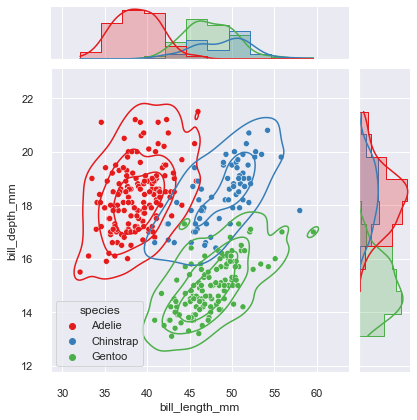

In [25]:
sns.set_theme()
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", palette="Set1")
g.plot_marginals(sns.histplot,  kde=True, hue=None, legend=False, element='step')
g.plot_joint(sns.kdeplot, levels=4)
g.plot_joint(sns.scatterplot);

## Exploring Figure-Level Plotting Functions

The purpose of seaborn’s figure-level functions is to facilitate the plotting process. They provide high-level interfaces with matplotlib through one of the classes discussed above, usually a FacetGrid, which manages the figure. They also provide a uniform interface to their underlying axes-level functions.

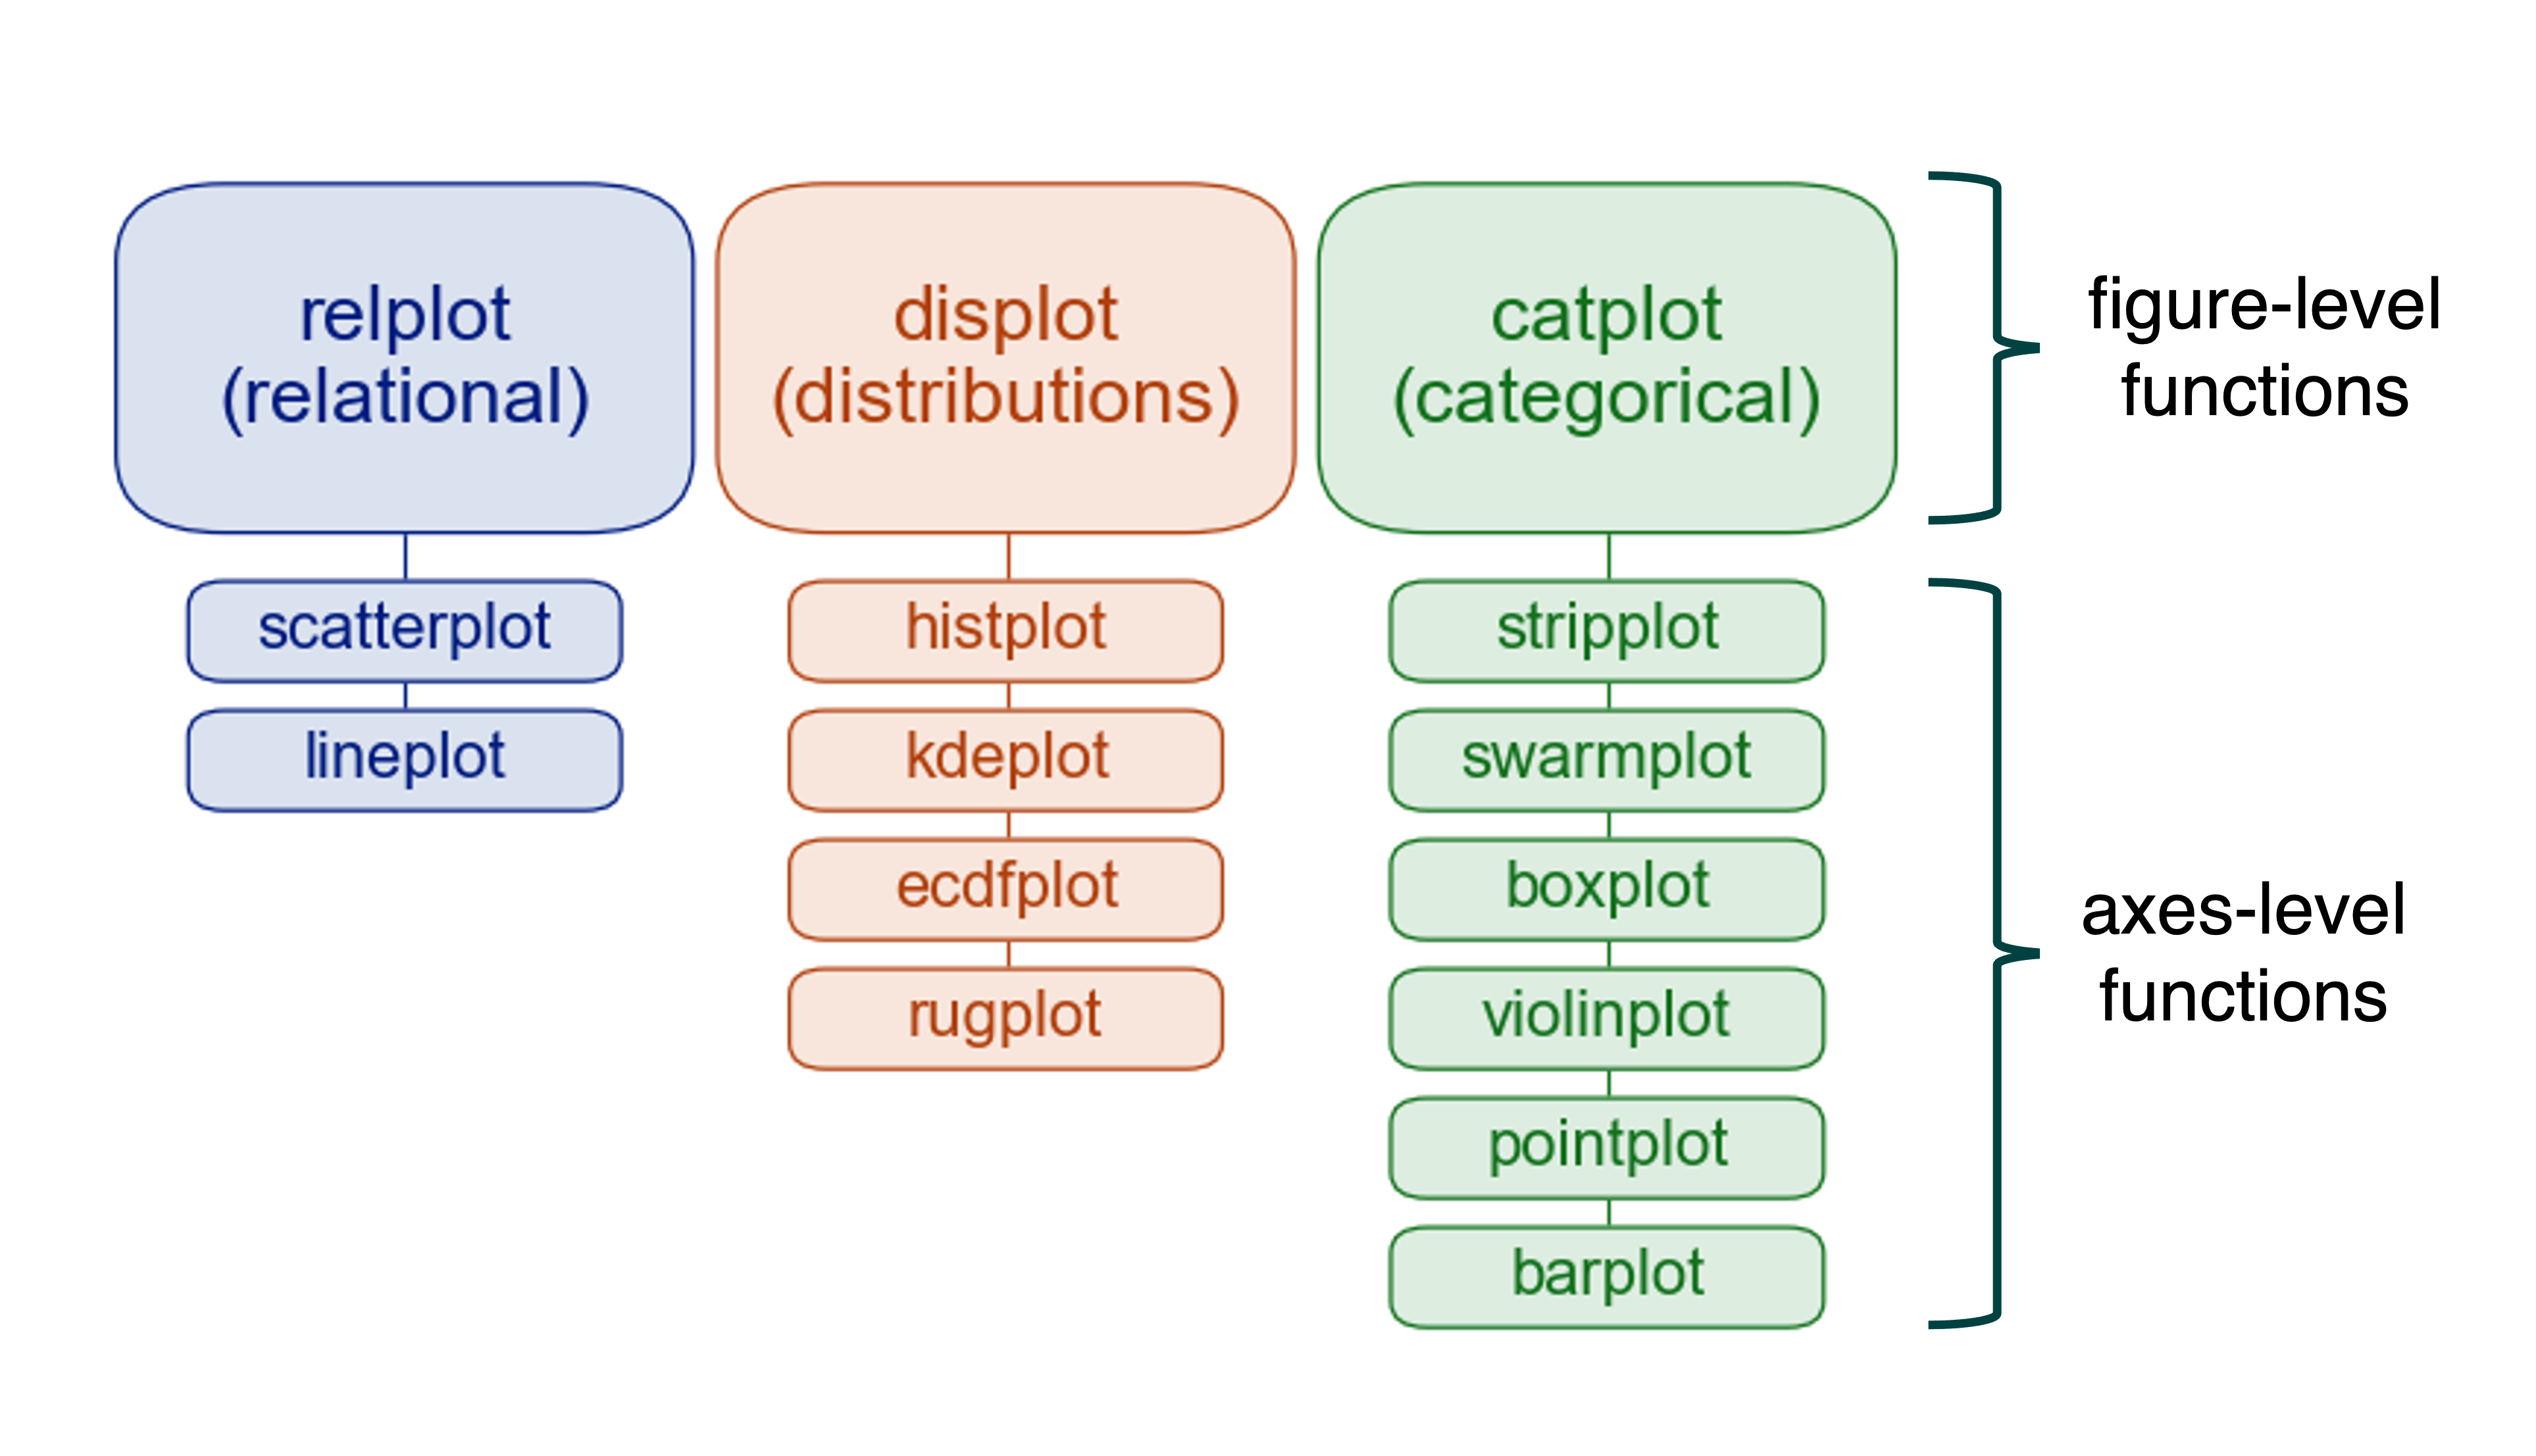

Hence, you don’t need to know the arguments and other details of the corresponding axes-level functions, nor do you need to know how to edit a matplotlib figure. It is perfectly fine to know only the arguments of the few figure-level functions provided by seaborn to generate very advanced figures, well unless you need more flexibility.

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


### relplot()

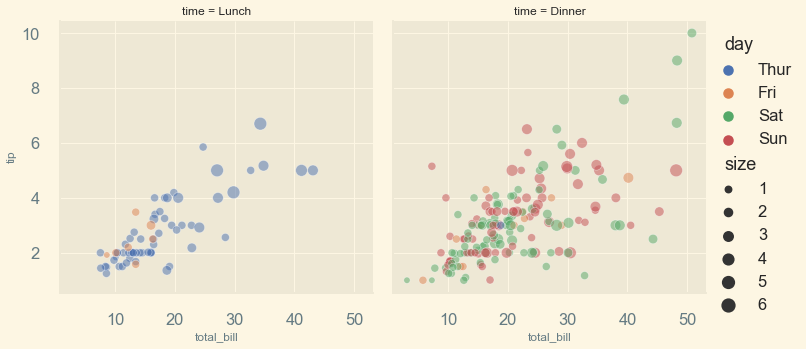

In [27]:
sns.set_context("talk")
plt.style.use('Solarize_Light2')
g = sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", size="size", alpha=.5, palette="deep")

In [28]:
type(g)

seaborn.axisgrid.FacetGrid

As we can see `relplot()` is a figure-level interface for drawing relational plots onto a FacetGrid

### catplot()

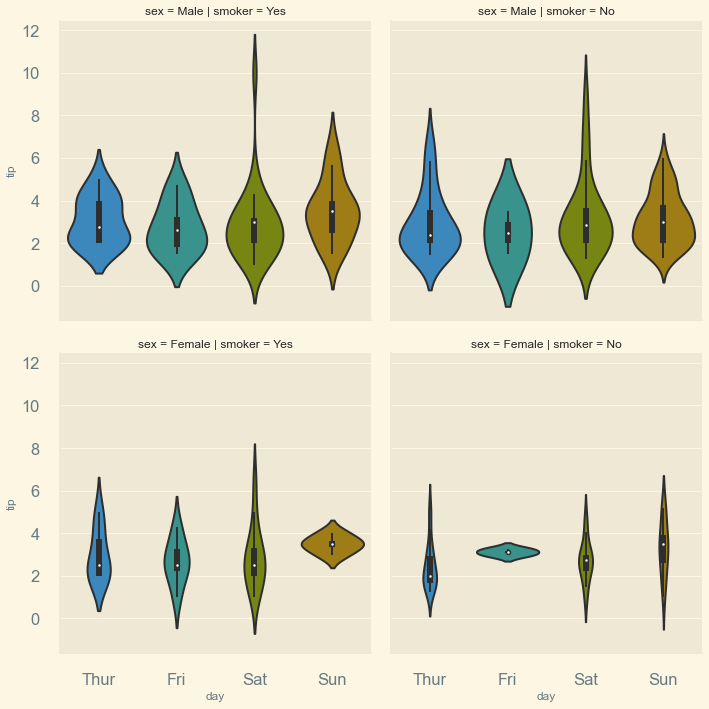

In [29]:
g = sns.catplot(data=tips, x='day', y='tip', row='sex', col='smoker', kind='violin')

In [30]:
type(g)

seaborn.axisgrid.FacetGrid

### lmplot()

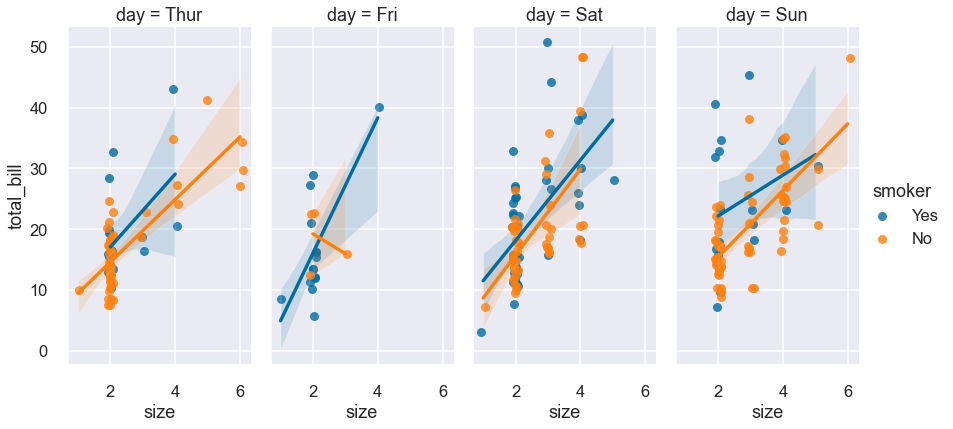

In [37]:
sns.set_theme()
plt.style.use('tableau-colorblind10')
sns.set_context("talk")

g = sns.lmplot(x="size", y="total_bill", hue="smoker", col="day",
               data=tips, height=6, aspect=.5, x_jitter=.1)


### pairplot()

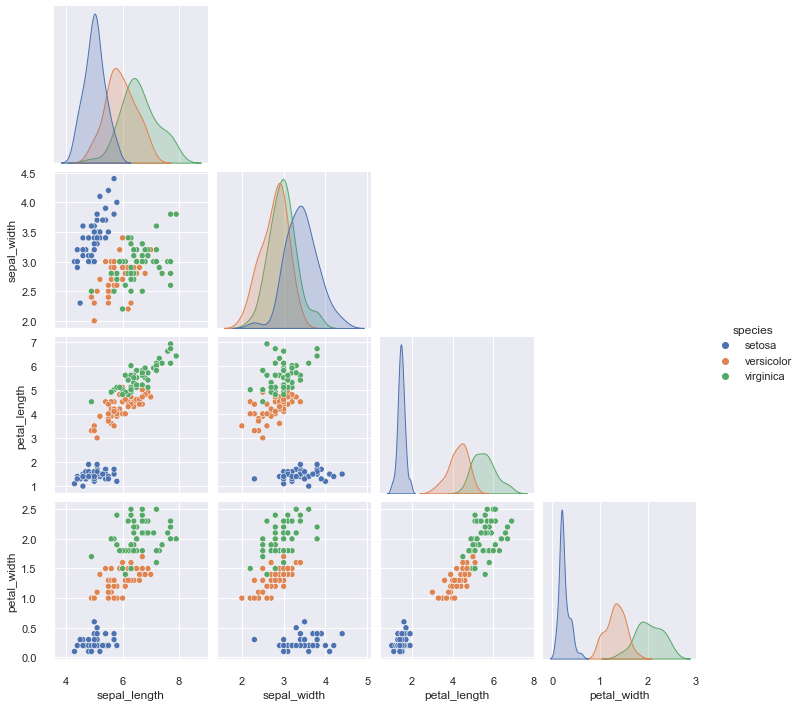

In [32]:
sns.set_theme()
sns.pairplot(iris, hue="species", corner=True)

### jointplot()

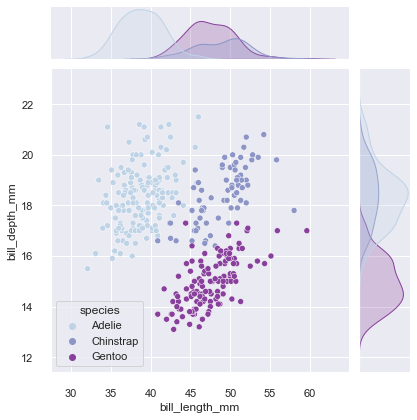

In [33]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="scatter", palette="BuPu", hue='species')